

# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

Let's go through these steps!

## Step 1: Get the Data (and format it)

We will be using some data about monthly milk production, full details on it can be found [here](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [4]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
#changing the name of columns 
df.columns = ['Month','Milk in Pounds Per Cow']

In [7]:
df.head()

,Month,Milk in Pounds Per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.tail()

,Month,Milk in Pounds Per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [9]:
#Since value of 168 row is not available we'll drop it
df.drop(168,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Milk in Pounds Per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [11]:
#adding days as we have only months and years
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df

,Month,Milk in Pounds Per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [13]:
#setting month column as the index
df.set_index('Month',inplace=True)

In [14]:
df

,Milk in Pounds Per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [15]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds Per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


# Visualising the data

<AxesSubplot:xlabel='Month'>

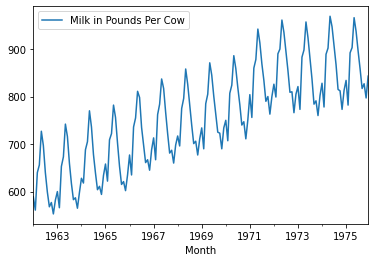

In [17]:
df.plot()

In [18]:
#since Milk in Pounds Per Cow' is very long we set it equal to variable 'time_series'
time_series = df['Milk in Pounds Per Cow']

In [19]:
type(time_series)

pandas.core.series.Series

In [20]:
#12 month rolling simple average
time_series.rolling(12).mean()

Month
1962-01-01           NaN
1962-02-01           NaN
1962-03-01           NaN
1962-04-01           NaN
1962-05-01           NaN
                 ...    
1975-08-01    856.750000
1975-09-01    856.916667
1975-10-01    858.166667
1975-11-01    860.166667
1975-12-01    862.666667
Name: Milk in Pounds Per Cow, Length: 168, dtype: float64

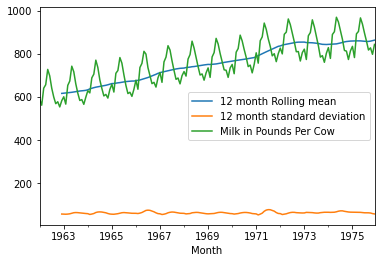

In [21]:
time_series.rolling(12).mean().plot(label = '12 month Rolling mean')

#plottinng standard deviation
time_series.rolling(12).std().plot(label='12 month standard deviation')

time_series.plot()
plt.legend()

## Decomposition

ETS decomposition allows us to see the individual parts!

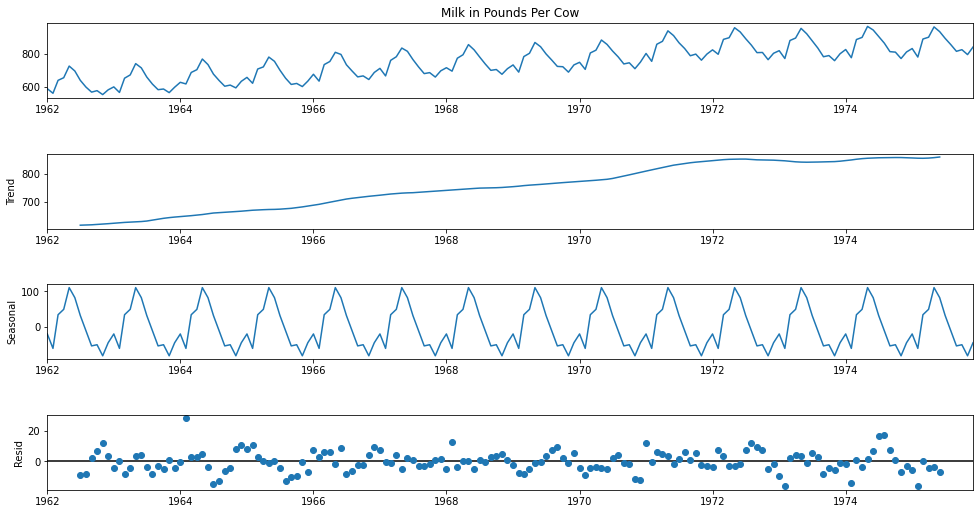

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(time_series,period=12)
fig = decomp.plot()
fig.set_size_inches(15,8)

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [23]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Milk in Pounds Per Cow'])

In [24]:
result

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [25]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dicky-fuller Test")
    labels = ['ADF Test Statistics','p-value','Number  of lags' , 'Num of Observation used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05: # result[1] is index of result printed above, which is 'p' value
        print("Strong evidence against null hypothesis")
        print('reject null hypothesis')
        print('Data has no unit root and is stationery')
    else:
        print("Weak evidence against null hypothesis")
        print('Fail to reject null hypothesis')
        print("Data has a unit root, and is non-stationary")

In [26]:
adf_check(df['Milk in Pounds Per Cow'])

Augmented Dicky-fuller Test
ADF Test Statistics : -1.3038115874221294
p-value : 0.6274267086030316
Number  of lags : 13
Num of Observation used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, and is non-stationary


___________

## Important Note!

** We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model. If our data was not seasonal, it means we could use just ARIMA on it. We will take this into account when differencing our data! Typically financial stock data won't be seasonal, but that is kind of the point of this section, to show you common methods, that won't work well on stock finance data!**

_____

## Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [27]:
#since it is non-stationary(which is visible from graph too) we procced 
# a step futher and calcculate step Differences

df['First Difference'] = df['Milk in Pounds Per Cow']-df['Milk in Pounds Per Cow'].shift(1)
df

,Milk in Pounds Per Cow,First Difference
Month,,
1962-01-01,589.0,NaN
1962-02-01,561.0,-28.0
1962-03-01,640.0,79.0
1962-04-01,656.0,16.0
1962-05-01,727.0,71.0
...,...,...
1975-08-01,858.0,-38.0
1975-09-01,817.0,-41.0
1975-10-01,827.0,10.0


<AxesSubplot:xlabel='Month'>

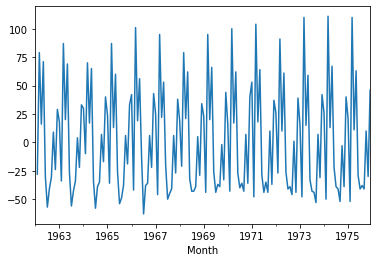

In [28]:
df['First Difference'].plot()

In [29]:
adf_check(df['First Difference'].dropna()) # we used dropna() because 
#our first row is has nan value as it has been shifted

Augmented Dicky-fuller Test
ADF Test Statistics : -3.0549955586530704
p-value : 0.030068004001785647
Number  of lags : 14
Num of Observation used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationery


In [30]:
#we have got our stationary value and don't need to proceed further 
#but incase if we get any data which don't get satisfied with first difference we need to 
#proceed further 
#it is just for illustration purpose
df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)

<AxesSubplot:xlabel='Month'>

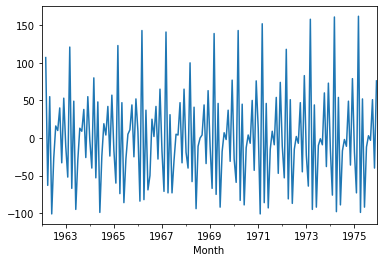

In [31]:
df['Second Difference'].plot()

In [32]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-fuller Test
ADF Test Statistics : -14.327873645603301
p-value : 1.1126989332084581e-26
Number  of lags : 11
Num of Observation used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationery


In [33]:
df['Seasonal Difference'] = df['Milk in Pounds Per Cow']-df['Milk in Pounds Per Cow'].shift(12)
df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference
Month,,,,
1962-01-01,589.0,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN
1962-04-01,656.0,16.0,-63.0,NaN
1962-05-01,727.0,71.0,55.0,NaN
...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0
1975-09-01,817.0,-41.0,-3.0,2.0
1975-10-01,827.0,10.0,51.0,15.0


<AxesSubplot:xlabel='Month'>

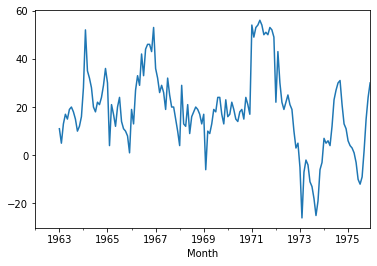

In [34]:
df['Seasonal Difference'].plot()

In [35]:
df['Seasonal First Difference'] = df['First Difference']-df['First Difference'].shift(12)
df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN
...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0
1975-09-01,817.0,-41.0,-3.0,2.0,11.0
1975-10-01,827.0,10.0,51.0,15.0,13.0


<AxesSubplot:xlabel='Month'>

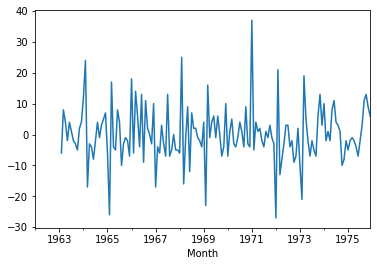

In [36]:
df['Seasonal First Difference'].plot()

# Autocorrelation and Partial Autocorrelation Plots

An autocorrelation plot (also known as a [Correlogram](https://en.wikipedia.org/wiki/Correlogram) ) shows the correlation of the series with itself, lagged by x time units. So the y axis is the correlation and the x axis is the number of time units of lag.

So imagine taking your time series of length T, copying it, and deleting the first observation of copy #1 and the last observation of copy #2. Now you have two series of length T−1 for which you calculate a correlation coefficient. This is the value of of the vertical axis at x=1x=1 in your plots. It represents the correlation of the series lagged by one time unit. You go on and do this for all possible time lags x and this defines the plot.

You will run these plots on your differenced/stationary data. There is a lot of great information for identifying and interpreting ACF and PACF [here](http://people.duke.edu/~rnau/arimrule.htm) and [here](https://people.duke.edu/~rnau/411arim3.htm).

### Autocorrelation Interpretation

The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.

_____
### <font color='red'> Important Note! </font> 

Here we will be showing running the ACF and PACF on multiple differenced data sets that have been made stationary in different ways, typically you would just choose a single stationary data set and continue all the way through with that.

The reason we use two here is to show you the two typical types of behaviour you would see when using ACF.
_____

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

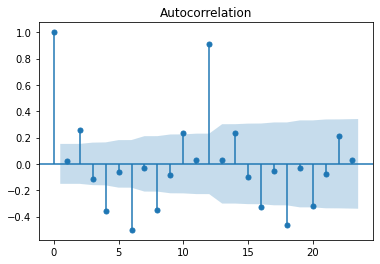

In [38]:
fig_first = plot_acf(df["First Difference"].dropna())

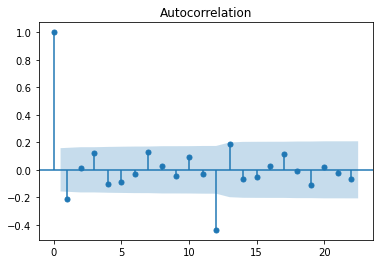

In [39]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

Pandas also has this functionality built in, but only for ACF, not PACF. So It is recommend using statsmodels, as ACF and PACF is more core to its functionality than it is to pandas' functionality.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

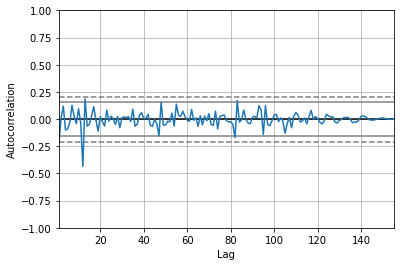

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

## Partial Autocorrelation

In general, a partial correlation is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables.  The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.

Formally, this is relationship is defined as:

## $\frac{\text{Covariance}(y, x_3|x_1, x_2)}{\sqrt{\text{Variance}(y|x_1, x_2)\text{Variance}(x_3| x_1, x_2)}}$

Check out this [link](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm) for full details on this.

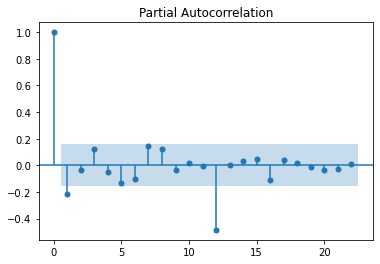

In [41]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

### Interpretation

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

_____
### Final ACF and PACF Plots

We've run quite a few plots, so let's just quickly get our "final" ACF and PACF plots. These are the ones we will be referencing in the rest of the notebook below.
_____

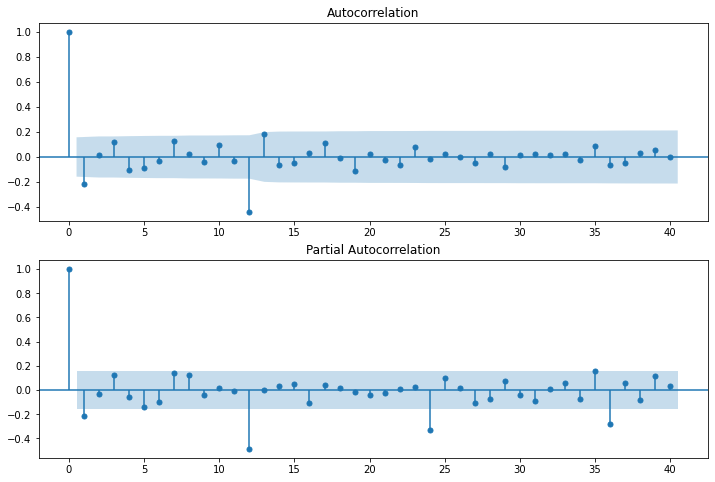

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

## Using the Seasonal ARIMA model

Finally we can use our ARIMA model now that we have an understanding of our data!

In [43]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [44]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

In [54]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds Per Cow'],order = (0,1,0),seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sumit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds Per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sat, 08 May 2021   AIC                           1074.131
Time:                                      21:49:49   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

In [57]:
#residual data or residual error points
results.resid

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
                 ...    
1975-08-01      2.641352
1975-09-01      8.158629
1975-10-01      7.676815
1975-11-01      6.572470
1975-12-01      5.936378
Length: 168, dtype: float64

<AxesSubplot:xlabel='Month'>

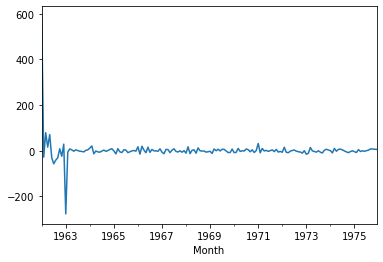

In [58]:
results.resid.plot()
#in 1963 we had big error

<AxesSubplot:ylabel='Density'>

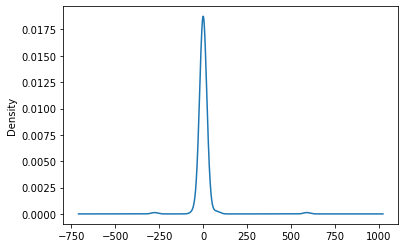

In [60]:
#kernel distribution error
results.resid.plot(kind='kde')

#close the value to 0 better is the model

## Prediction of Future Values

Firts we can get an idea of how well our model performs by just predicting for values that we actually already know:

<AxesSubplot:xlabel='Month'>

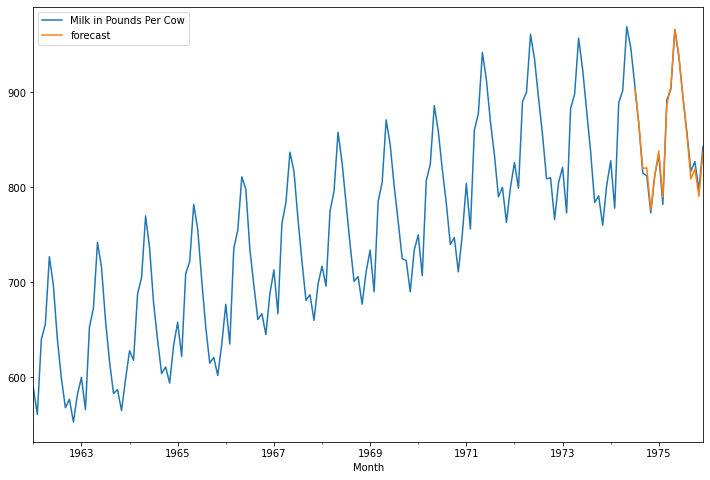

In [69]:
#creatinng dummy forecast

df['forecast'] = results.predict(start=150,end=168) #total 28 points
df[['Milk in Pounds Per Cow','forecast']].plot(figsize = (12,8))

In [62]:
df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841371
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185


### Last 28 values have forecast values rest have Nan

In [63]:
## inrementing date to next 2 years for prediction

from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(1,24) ]

#df.index[-1] is the last index value i.e "1975-12-01" the we are adding of set of 1,2,3..24 months

In [64]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [65]:
#now adding all the columns on above timestamps(future_dates)
future_df = pd.DataFrame(index = future_dates,columns=df.columns)

In [66]:
future_df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Now concating previous data(training data) + new 2 yrs data(test data)

final_df = pd.concat([df,future_df])

In [68]:
final_df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#creating original forecast
final_df['forecast'] = results.predict(start=168,end=192) #total 24 data

In [71]:
final_df

,Milk in Pounds Per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN
...,...,...,...,...,...,...
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525866
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918956
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027294


<AxesSubplot:>

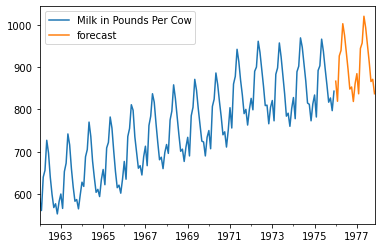

In [73]:
final_df[['Milk in Pounds Per Cow','forecast']].plot()

In [76]:
! git add ArimaTUT.ipynb
! git commit -m "22:09/08-05-2021"
! git push origin main

The file will have its original line endings in your working directory
